# DivNoising - Prediction
This notebook contains an example on how to use a previously trained 3D DivNoising VAE to denoise images.
If you haven't done so please first run 'Fluo-N3DH-CHO-Training.ipynb', which will download the data and train the VAE.  

In [1]:
# We import all our dependencies.
import urllib
import os
import zipfile
import numpy as np
from tqdm import tqdm
from tifffile import imread
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../../../')

from divnoising import dataLoader
from divnoising import utils
from divnoising import training
from nets import model
import torch
from divnoising.utils import loadImages

from tqdm import tqdm

# Load data to predict on

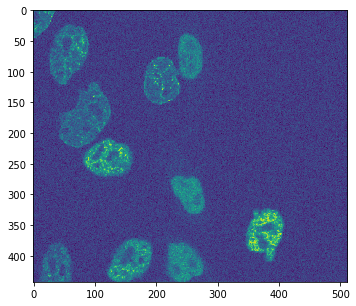

In [2]:
path="./data/Fluo-N3DH-CHO_01/"

signal= imread(path+'*.tif').astype(np.float32)
gaussian_noise_std = 15.0

file_names = sorted(glob(path+'*.tif'))
signal = []
for f in file_names:
    signal.append(imread(f))
signal= np.array(signal)

observation = []
for i in range(signal.shape[0]):
    observation.append(signal[i]+np.random.randn(signal[i].shape[0], signal[i].shape[1], signal[i].shape[2])*gaussian_noise_std)
observation = np.array(observation)

img_width, img_height = signal.shape[2], signal.shape[3]

plt.figure(figsize=(15, 5))
plt.imshow(observation[0][0])


# Load our model

In [3]:
vae = torch.load('fluon3dh-last_vae.net')

# Here we predict some qulitative diverse solutions

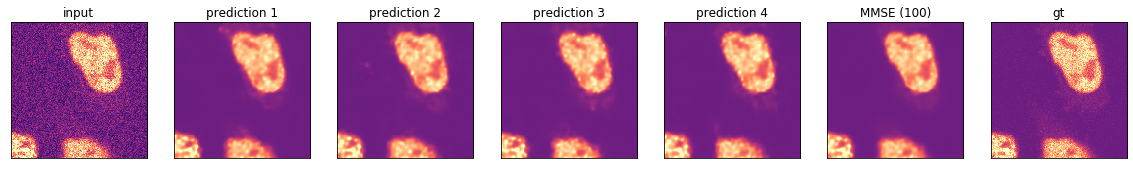

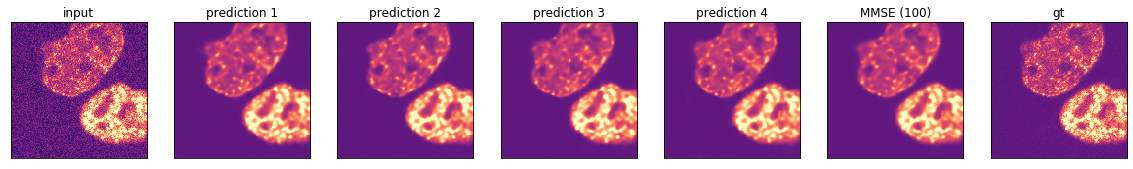

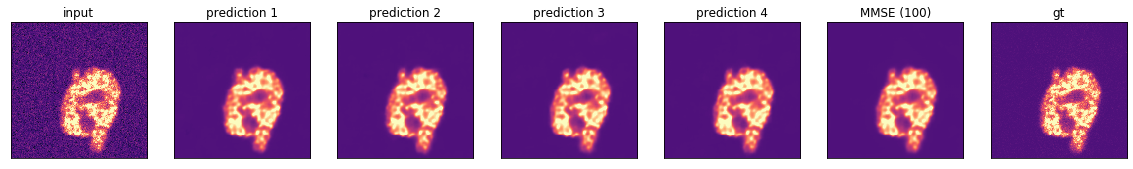

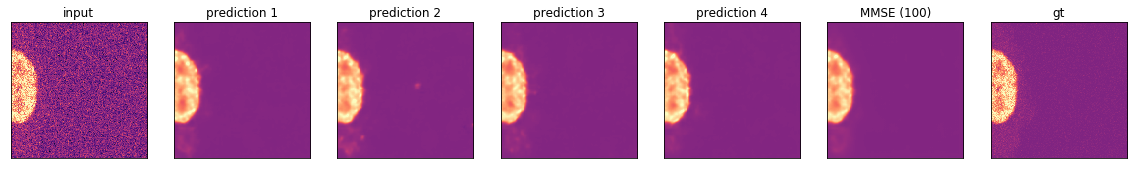

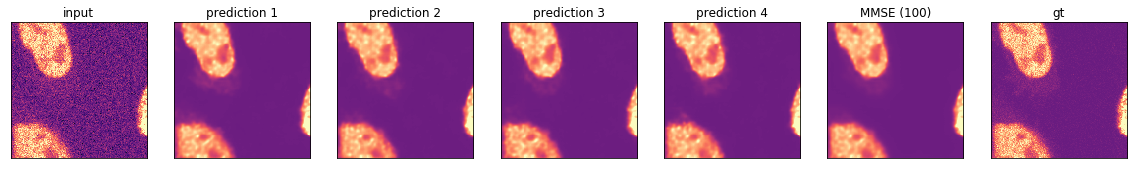

In [24]:
for j in range(5):  
    
    # we select a random crop
    size=140
    size_z=4
    
    minx=np.random.randint(0,signal.shape[2]-size)
    miny=np.random.randint(0,signal.shape[3]-size)
    gt=signal[0][:,minx:minx+size,miny:miny+size]
    img=observation[0][:,minx:minx+size,miny:miny+size]
    imgT=torch.Tensor(img)
    
    # determine the min and max value for display
    vmin=np.percentile(img,0)
    vmax=np.percentile(img,99)
    
    # generate samples and MMSE estimate
    imgMMSE, samps=utils.predictMMSE(vae, imgT, 100, returnSamples=True, tq=False)
    
    plt.figure(figsize=(20, 6.75))
    
    # We display the noisy input image
    ax=plt.subplot(1,7,1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(img[0],vmin=vmin, vmax=vmax,cmap='magma')
    plt.title('input')
    
    # We display the ground truth
    ax=plt.subplot(1,7,7)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(gt[0],vmin=vmin, vmax=vmax,cmap='magma')
    plt.title('gt')

    # We display the average of 100 predicted samples
    ax=plt.subplot(1,7,6)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(imgMMSE[0],vmin=vmin, vmax=vmax,cmap='magma')
    plt.title('MMSE (100)')
    
    #We also display the first 4 samples
    for i in range(4):     
        ax=plt.subplot(1,7,i+2)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.imshow(samps[i][0],vmin=vmin, vmax=vmax,cmap='magma')
        plt.title('prediction '+str(i+1))

    plt.show()

# Compute PSNR and the dataset

In [26]:
import time
PSNRs=[]
for i in range(observation.shape[0]):
    img=observation[i][:,:440,:]
    imgMMSE=utils.predictMMSE(vae, img, 100)
    psnr=utils.PSNR(signal[i][:,:440,:],imgMMSE)
    PSNRs.append(psnr)
    print("psnr:"+str(psnr)+ "\t mean psnr:"+ str(np.mean(PSNRs)) )
    time.sleep(0.5)
    
print('mean',np.mean(PSNRs))

100%|██████████| 100/100 [00:03<00:00, 31.54it/s]


psnr:32.56520587508186	 mean psnr:32.56520587508186


100%|██████████| 100/100 [00:03<00:00, 31.45it/s]


psnr:32.868153883335225	 mean psnr:32.71667987920854


100%|██████████| 100/100 [00:03<00:00, 31.61it/s]


psnr:33.28917597441773	 mean psnr:32.90751191094494


100%|██████████| 100/100 [00:03<00:00, 30.39it/s]


psnr:33.6087129918947	 mean psnr:33.082812181182376


100%|██████████| 100/100 [00:03<00:00, 30.97it/s]


psnr:33.728633880661945	 mean psnr:33.21197652107829


100%|██████████| 100/100 [00:03<00:00, 31.40it/s]


psnr:33.629678204229776	 mean psnr:33.28159346827021


100%|██████████| 100/100 [00:03<00:00, 31.01it/s]


psnr:31.781656267803374	 mean psnr:33.06731672534637


100%|██████████| 100/100 [00:03<00:00, 31.31it/s]


psnr:33.36951326381759	 mean psnr:33.105091292655274


100%|██████████| 100/100 [00:03<00:00, 31.01it/s]


psnr:32.418239793943485	 mean psnr:33.028774459465076


100%|██████████| 100/100 [00:03<00:00, 27.34it/s]


psnr:31.485683960959793	 mean psnr:32.87446540961455


100%|██████████| 100/100 [00:03<00:00, 30.12it/s]


psnr:32.28308557091088	 mean psnr:32.82070360609603


100%|██████████| 100/100 [00:03<00:00, 31.10it/s]


psnr:31.86480133774539	 mean psnr:32.74104508373348


100%|██████████| 100/100 [00:03<00:00, 26.39it/s]


psnr:32.984017593637006	 mean psnr:32.759735276802985


100%|██████████| 100/100 [00:03<00:00, 29.36it/s]


psnr:31.855397782205003	 mean psnr:32.695139741474556


100%|██████████| 100/100 [00:03<00:00, 31.16it/s]


psnr:33.76145527628932	 mean psnr:32.76622744379554


100%|██████████| 100/100 [00:03<00:00, 26.95it/s]


psnr:31.655844335874498	 mean psnr:32.69682849955048


100%|██████████| 100/100 [00:03<00:00, 30.35it/s]


psnr:31.900759644501765	 mean psnr:32.65000091984173


100%|██████████| 100/100 [00:03<00:00, 28.02it/s]


psnr:33.36093777158307	 mean psnr:32.68949741160514


100%|██████████| 100/100 [00:03<00:00, 28.90it/s]


psnr:33.30140997877639	 mean psnr:32.7217033361931


100%|██████████| 100/100 [00:03<00:00, 30.11it/s]


psnr:33.04443568907229	 mean psnr:32.73783995383706


100%|██████████| 100/100 [00:03<00:00, 27.60it/s]


psnr:33.43096142466627	 mean psnr:32.770845738162265


100%|██████████| 100/100 [00:03<00:00, 29.20it/s]


psnr:33.3730019022653	 mean psnr:32.79821647289422


100%|██████████| 100/100 [00:03<00:00, 30.31it/s]


psnr:31.699755808022374	 mean psnr:32.75045731355196


100%|██████████| 100/100 [00:03<00:00, 29.50it/s]


psnr:33.52866102337389	 mean psnr:32.78288246812787


100%|██████████| 100/100 [00:03<00:00, 26.86it/s]


psnr:33.763433457307755	 mean psnr:32.822104507695066


100%|██████████| 100/100 [00:03<00:00, 29.15it/s]


psnr:33.777703796054496	 mean psnr:32.85885832647812


100%|██████████| 100/100 [00:03<00:00, 30.69it/s]


psnr:33.470706805585124	 mean psnr:32.881519381259864


100%|██████████| 100/100 [00:03<00:00, 26.05it/s]


psnr:33.89551831155369	 mean psnr:32.91773362877036


100%|██████████| 100/100 [00:03<00:00, 29.64it/s]


psnr:32.131461732685764	 mean psnr:32.890620804767444


100%|██████████| 100/100 [00:03<00:00, 26.46it/s]


psnr:32.08278457828996	 mean psnr:32.86369293055153


100%|██████████| 100/100 [00:03<00:00, 30.60it/s]


psnr:33.93661686999676	 mean psnr:32.898303380211054


100%|██████████| 100/100 [00:03<00:00, 29.72it/s]


psnr:32.36192127890767	 mean psnr:32.881541439545316


100%|██████████| 100/100 [00:03<00:00, 29.40it/s]


psnr:34.19010545904336	 mean psnr:32.92119489468162


100%|██████████| 100/100 [00:03<00:00, 30.59it/s]


psnr:34.06099614906362	 mean psnr:32.95471846098697


100%|██████████| 100/100 [00:04<00:00, 24.97it/s]


psnr:32.27764262383627	 mean psnr:32.93537343706838


100%|██████████| 100/100 [00:03<00:00, 28.00it/s]


psnr:32.31642768449839	 mean psnr:32.91818049949699


100%|██████████| 100/100 [00:03<00:00, 29.72it/s]


psnr:34.2159780742567	 mean psnr:32.953256109625634


100%|██████████| 100/100 [00:03<00:00, 29.84it/s]


psnr:34.2279819636679	 mean psnr:32.98680152683727


100%|██████████| 100/100 [00:03<00:00, 27.78it/s]


psnr:32.49699997681194	 mean psnr:32.97424251273406


100%|██████████| 100/100 [00:03<00:00, 30.76it/s]


psnr:32.404901176556734	 mean psnr:32.96000897932963


100%|██████████| 100/100 [00:03<00:00, 25.54it/s]


psnr:32.398424436739106	 mean psnr:32.946311795364004


100%|██████████| 100/100 [00:03<00:00, 29.99it/s]


psnr:32.147277126057006	 mean psnr:32.9272871603805


100%|██████████| 100/100 [00:03<00:00, 28.82it/s]


psnr:32.315733275374	 mean psnr:32.913064977008254


100%|██████████| 100/100 [00:03<00:00, 26.60it/s]


psnr:32.28491479828921	 mean psnr:32.898788836582824


100%|██████████| 100/100 [00:03<00:00, 30.14it/s]


psnr:32.53674473752982	 mean psnr:32.89074341215942


100%|██████████| 100/100 [00:03<00:00, 25.93it/s]


psnr:32.96208315309474	 mean psnr:32.8922942760928


100%|██████████| 100/100 [00:03<00:00, 29.84it/s]


psnr:32.93283563382958	 mean psnr:32.893156858172304


100%|██████████| 100/100 [00:03<00:00, 28.53it/s]


psnr:32.97402070969982	 mean psnr:32.894841521745796


100%|██████████| 100/100 [00:03<00:00, 28.52it/s]


psnr:32.98558407105567	 mean psnr:32.896693410507226


100%|██████████| 100/100 [00:03<00:00, 29.08it/s]


psnr:32.918832266705465	 mean psnr:32.89713618763119


100%|██████████| 100/100 [00:03<00:00, 26.54it/s]


psnr:33.09934071117824	 mean psnr:32.901100982210544


100%|██████████| 100/100 [00:03<00:00, 30.00it/s]


psnr:32.895128137296936	 mean psnr:32.90098611980836


100%|██████████| 100/100 [00:03<00:00, 27.57it/s]


psnr:33.59334385551729	 mean psnr:32.9140494733123


100%|██████████| 100/100 [00:03<00:00, 26.62it/s]


psnr:33.60538349114285	 mean psnr:32.92685195512398


100%|██████████| 100/100 [00:03<00:00, 31.12it/s]


psnr:33.8748066457186	 mean psnr:32.944087494952974


100%|██████████| 100/100 [00:03<00:00, 30.76it/s]


psnr:33.77469443330224	 mean psnr:32.958919761709204


100%|██████████| 100/100 [00:03<00:00, 25.12it/s]


psnr:33.5024738643771	 mean psnr:32.96845579859812


100%|██████████| 100/100 [00:03<00:00, 30.17it/s]


psnr:33.46244251890667	 mean psnr:32.976972811017234


100%|██████████| 100/100 [00:03<00:00, 26.33it/s]


psnr:33.148704762215175	 mean psnr:32.979883522054486


100%|██████████| 100/100 [00:03<00:00, 29.47it/s]


psnr:33.630654963781744	 mean psnr:32.99072971274994


100%|██████████| 100/100 [00:03<00:00, 26.15it/s]


psnr:33.76431816394741	 mean psnr:33.00341149063842


100%|██████████| 100/100 [00:03<00:00, 28.14it/s]


psnr:33.543139887269696	 mean psnr:33.01211678735828


100%|██████████| 100/100 [00:03<00:00, 27.61it/s]


psnr:33.638612429459684	 mean psnr:33.02206116262973


100%|██████████| 100/100 [00:03<00:00, 28.99it/s]


psnr:33.67805669732017	 mean psnr:33.032311092859274


100%|██████████| 100/100 [00:03<00:00, 28.94it/s]


psnr:33.784463564049005	 mean psnr:33.04388266933912


100%|██████████| 100/100 [00:03<00:00, 30.09it/s]


psnr:33.227493574964555	 mean psnr:33.046664652757684


100%|██████████| 100/100 [00:03<00:00, 26.79it/s]


psnr:33.30508184999049	 mean psnr:33.05052162585071


100%|██████████| 100/100 [00:03<00:00, 26.85it/s]


psnr:33.24267854019668	 mean psnr:33.05334746282639


100%|██████████| 100/100 [00:03<00:00, 30.24it/s]


psnr:32.968286819666204	 mean psnr:33.05211469988203


100%|██████████| 100/100 [00:03<00:00, 26.16it/s]


psnr:31.90541683325109	 mean psnr:33.0357333017873


100%|██████████| 100/100 [00:03<00:00, 29.70it/s]


psnr:32.15918687489929	 mean psnr:33.02338757746494


100%|██████████| 100/100 [00:03<00:00, 26.80it/s]


psnr:32.35127415664205	 mean psnr:33.014052668842396


100%|██████████| 100/100 [00:03<00:00, 30.97it/s]


psnr:31.972547939485285	 mean psnr:32.999785480769006


100%|██████████| 100/100 [00:03<00:00, 25.17it/s]


psnr:33.5801713234424	 mean psnr:33.00762853269703


100%|██████████| 100/100 [00:03<00:00, 30.40it/s]


psnr:33.755871980057144	 mean psnr:33.01760511199516


100%|██████████| 100/100 [00:03<00:00, 26.27it/s]


psnr:34.08037375900349	 mean psnr:33.03158890998211


100%|██████████| 100/100 [00:03<00:00, 28.85it/s]


psnr:32.35939543558916	 mean psnr:33.02285912460039


100%|██████████| 100/100 [00:03<00:00, 30.76it/s]


psnr:32.24444332329888	 mean psnr:33.012879434840116


100%|██████████| 100/100 [00:03<00:00, 25.64it/s]


psnr:32.42588092712962	 mean psnr:33.00544907398302


100%|██████████| 100/100 [00:03<00:00, 30.09it/s]


psnr:32.378488317520564	 mean psnr:32.99761206452724


100%|██████████| 100/100 [00:03<00:00, 30.46it/s]


psnr:32.47443628334126	 mean psnr:32.991153104265685


100%|██████████| 100/100 [00:03<00:00, 25.76it/s]


psnr:32.55801816606828	 mean psnr:32.98587097087303


100%|██████████| 100/100 [00:03<00:00, 29.15it/s]


psnr:32.71478115681804	 mean psnr:32.98260482853502


100%|██████████| 100/100 [00:03<00:00, 26.28it/s]


psnr:32.414120786981705	 mean psnr:32.97583716137367


100%|██████████| 100/100 [00:03<00:00, 26.69it/s]


psnr:32.528920789905825	 mean psnr:32.970579321709344


100%|██████████| 100/100 [00:03<00:00, 31.44it/s]


psnr:32.87988644270477	 mean psnr:32.96952475334883


100%|██████████| 100/100 [00:03<00:00, 26.13it/s]


psnr:33.05976937404296	 mean psnr:32.970562047839564


100%|██████████| 100/100 [00:03<00:00, 30.37it/s]


psnr:32.940618420797136	 mean psnr:32.970221779350446


100%|██████████| 100/100 [00:03<00:00, 26.19it/s]


psnr:33.074712733657705	 mean psnr:32.97139583501682


100%|██████████| 100/100 [00:03<00:00, 26.57it/s]


psnr:33.36683619876537	 mean psnr:32.975789616836245


100%|██████████| 100/100 [00:03<00:00, 26.33it/s]


psnr:31.441004540937804	 mean psnr:32.95892384677143


100%|██████████| 100/100 [00:03<00:00, 30.86it/s]


psnr:32.19460151725923	 mean psnr:32.950615995363684
mean 32.950615995363684
